# Jamboree Education - Linear Regression

## Jamboree Education
Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective. 

**Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)


**Problem Statment:** Predict the chances of graduate admission based on the given features.

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy as sp


## Load The DataSet

In [4]:
ds = pd.read_csv("Jamboree_Admission_dataset.csv")
ds

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


## Observations On DataSet

In [5]:
# shape of data set
ds.shape

(500, 9)

In [6]:
# data types of attributes of the data set
ds.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
# check for missing values
ds.isnull()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [8]:
# check for missing values
ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# statistical summary
ds.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Exploratory Data Analysis

In [10]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

## Univariate Analysis

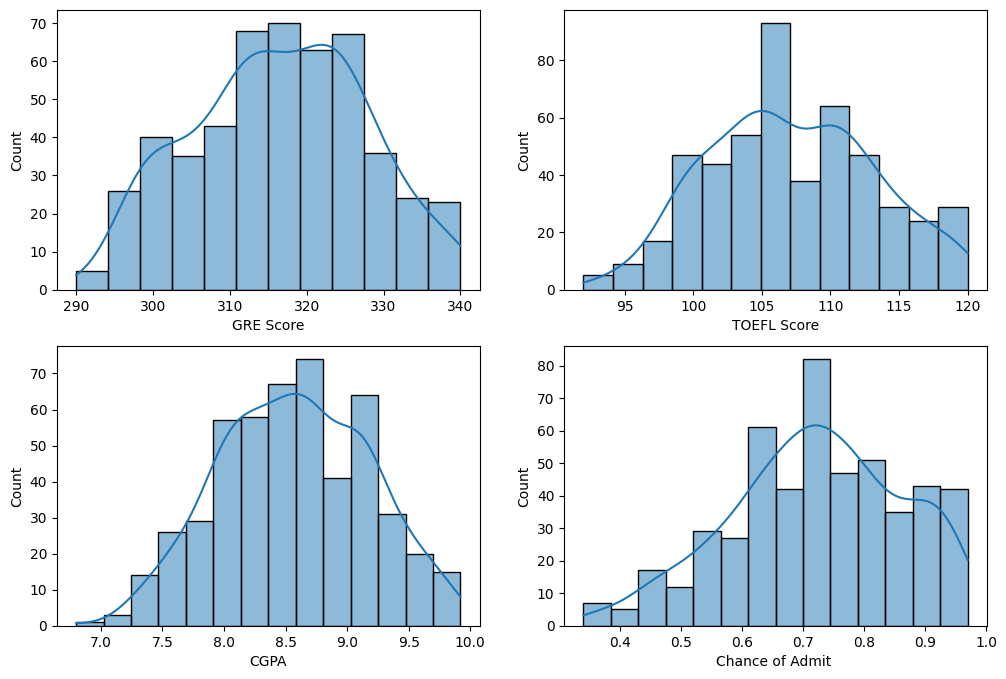

In [11]:
# check distribution of each numerical variable

rows, cols = 2, 2

fig, axs = plt.subplots(rows,cols, figsize=(12, 8))

sns.histplot(ds[num_cols[0]],kde=True, ax = axs[0,0])

sns.histplot(ds[num_cols[1]],kde=True, ax = axs[0,1])
        
sns.histplot(ds[num_cols[-1]], kde=True, ax=axs[1,0])

sns.histplot(ds[target], kde=True, ax=axs[1,1])

plt.show()

### Insights
- from the above graph analysis we can check that how many students got the GRE Scores, TOEFL Scores, CGPA, and Chance of Admit

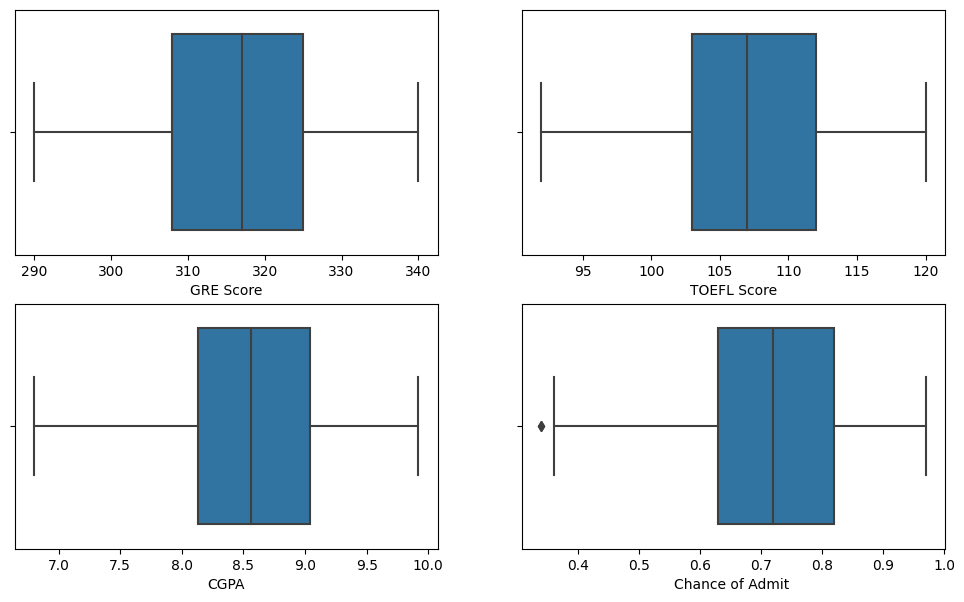

In [12]:
# Checking Outliers Using BoxPlots

rows, cols = 2, 2

fig, axs = plt.subplots(rows,cols, figsize=(12, 7))

sns.boxplot(x=num_cols[0], data = ds, ax = axs[0,0])

sns.boxplot(x=num_cols[1], data = ds, ax = axs[0,1])
        
sns.boxplot(x=num_cols[2], data = ds, ax = axs[1,0])

sns.boxplot(x= target, data = ds, ax = axs[1,1])

plt.show()

### Insights
- We can see clearly that there are no outliers in the above features or independent variables

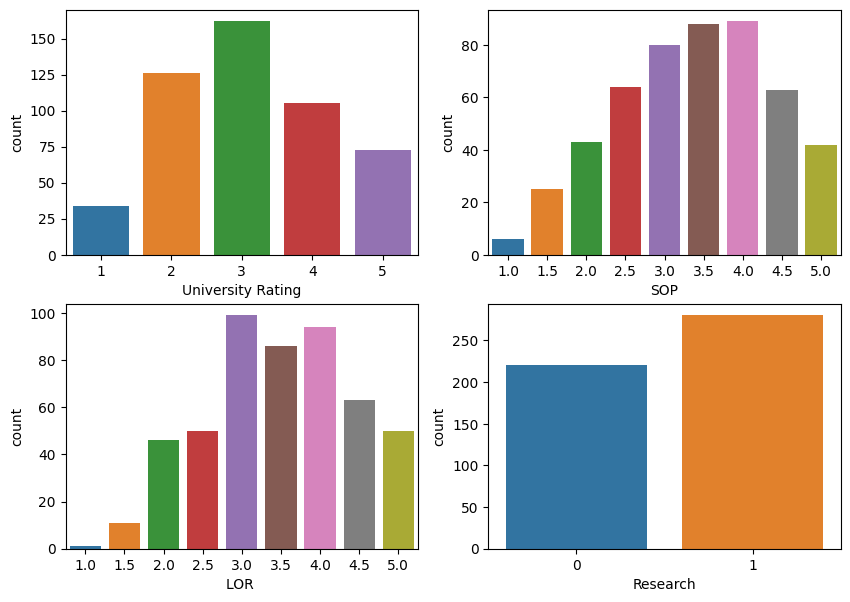

In [13]:
# Countplots for categorical variables

cols, rows = 2, 2

fig, axs = plt.subplots(rows, cols, figsize=(10, 7))

index = 0

for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=ds, ax=axs[row, col], alpha=1)
        index += 1
        
plt.show()

### Insights
 - from the above graph analysis we can check that how many students opted according to university rating, SOP, LOR, Research

## Bivariate Analysis

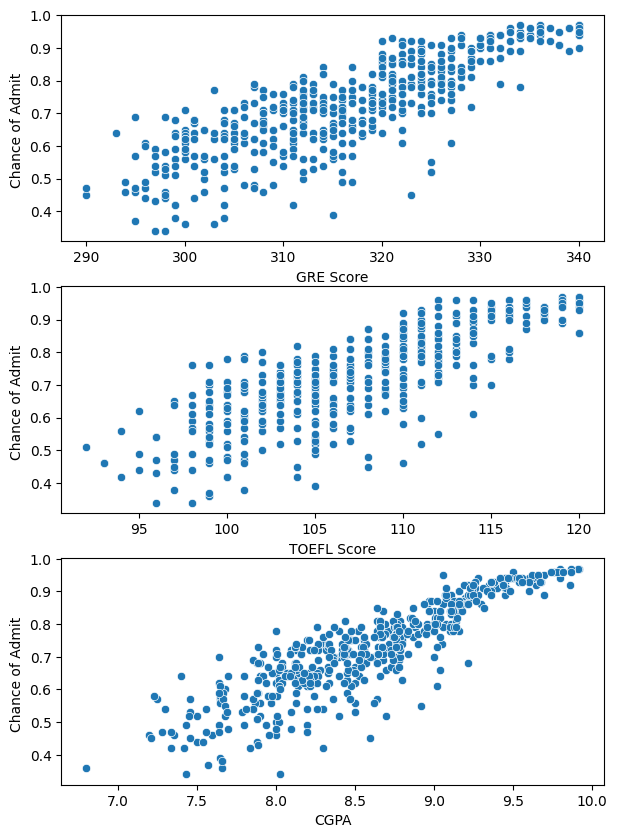

In [14]:
# check relation bw continuous variables & target variable

fig, axs = plt.subplots(3,1, figsize=(7,10))

sns.scatterplot(x=num_cols[0], y=target, data=ds, ax=axs[0])

sns.scatterplot(x=num_cols[1], y=target, data=ds, ax=axs[1])

sns.scatterplot(x=num_cols[2], y=target, data=ds, ax=axs[2])

plt.show()

### Insights
- We can say that the continuos variables and target variables are linearly correalted.
- It generally indicates a strong relationship between the predictors and the outcome. 
- Strong Predictive Power: Linear correlation between independent variables and the target variable means that the predictors are informative in predicting the outcome.

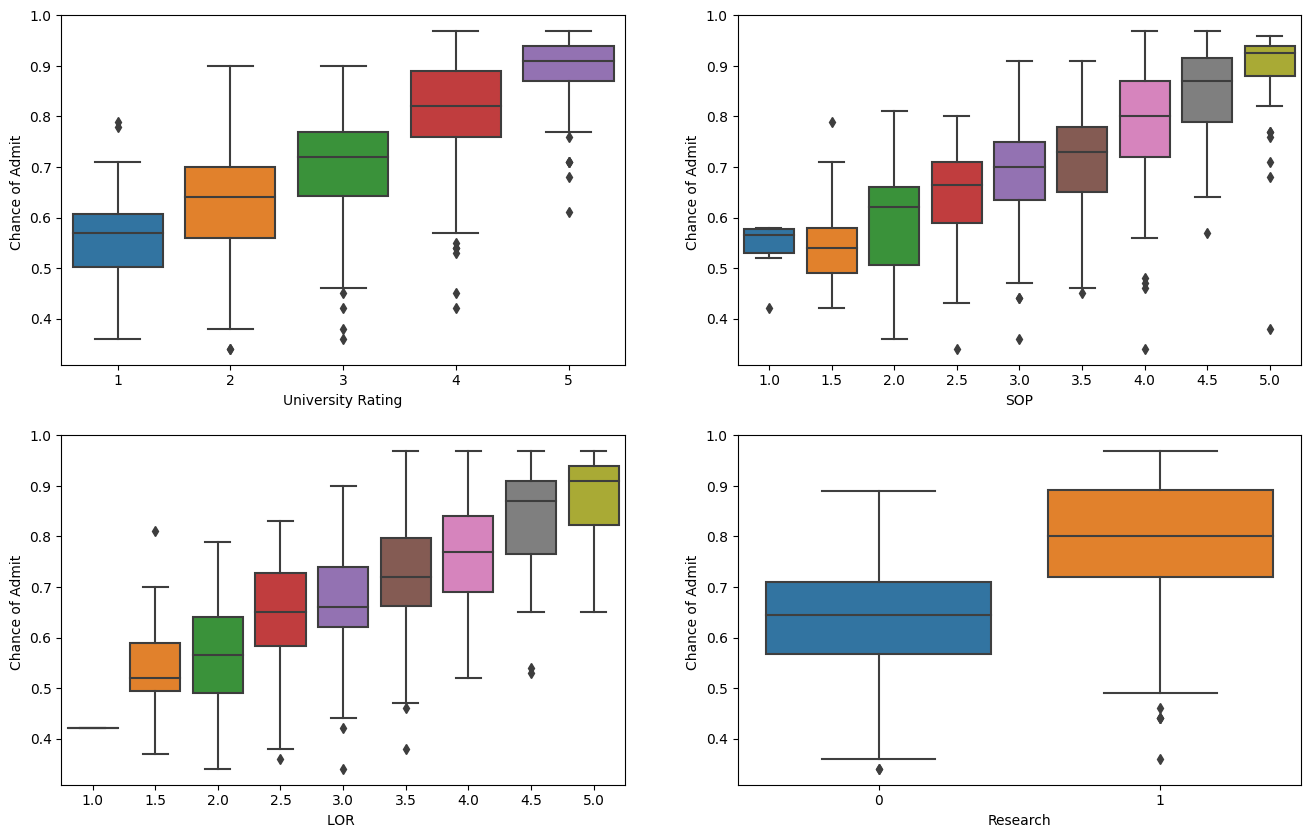

In [15]:
# check relation b/1w Categorical variables & target variable
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))

index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=ds, ax=axs[row,col])
        index += 1

### Insights
- From this, we can that as the rating increases the chance of getting an admission also increases.
- Students who have the research experience have more chances of getting an admission as compared to other students who don't have the research experience.

In [16]:
# Correlation 
ds.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


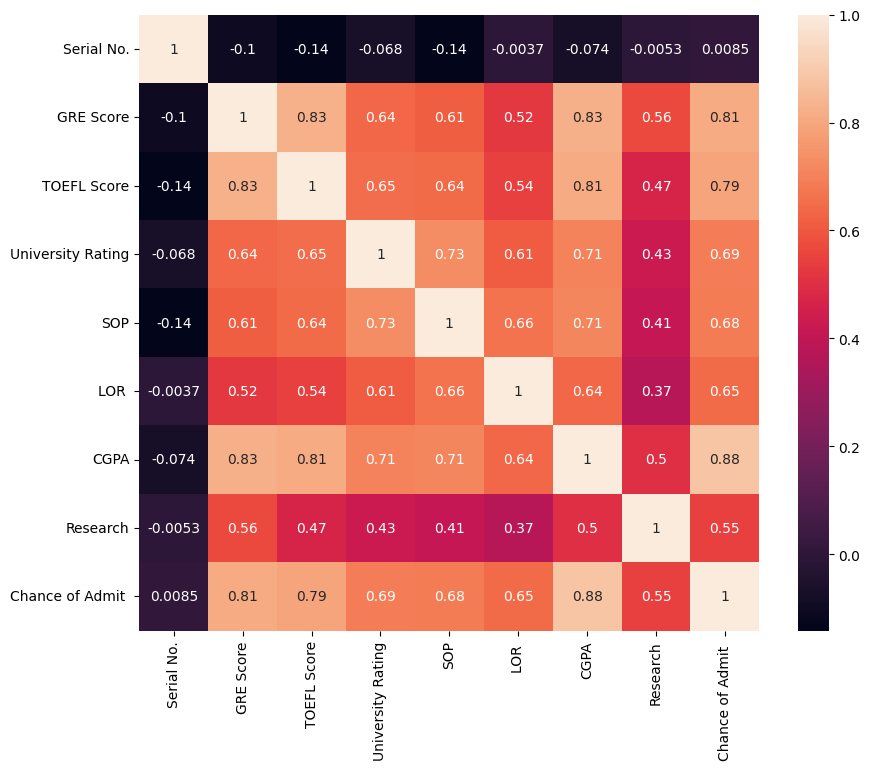

In [17]:
# Heatmap  
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr(), annot=True)
plt.show()

### Insights
- we can see that the CGPA and Chance of Admit are highly related to each other which means the cgpa plays a major role in getting an admission in foreign universities.
- And next GRE and TOEFL Scores are closely related to the chance of admit

## Data Preprocessing

In [18]:
# dropping unnecessary column

ds = ds.drop(columns=['Serial No.'], axis=1)

In [19]:
ds.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
# checking the duplicates

ds.duplicated().sum()

0

**Data Preparation for model building**

In [21]:
x = ds.drop(columns=[target])
y = ds[target]

In [22]:
# standardize the dataset
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


## Model Building

# LINEAR REGRESSION

## Linear regression  
### y = (w1x1) + (w2x2) .......... (wnxn) + w0
#### x represents the independent variables.
#### y represents the dependent variable.


In [24]:
# calling the linear regression function
li_reg = LinearRegression()
li_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
# Model Coefficients

print(f'The coefficient for linear regression: {li_reg.coef_}')
print()
print(f'The intercept for linear regression: {li_reg.intercept_}')

The coefficient for linear regression: [ 0.01865693  0.02317626  0.01156475 -0.00099944  0.01249708  0.06467088
  0.01396816]

The intercept for linear regression: 0.724978121476996


## Insights
- CGPA feature has a high Positive influence on the predicted output over the remaining features.
- SOP feature has a negative influence on the predicted output.

###  Checking  MAE,  RSME,  R^2   and  Adjusted R^2 for Linear Regression

In [26]:
y_predict = li_reg.predict(x_test)

In [27]:
print('The score of Linear Regression for Training Data:',li_reg.score(x_train,y_train))

print('The score of Linear Regression for Test Data:',li_reg.score(x_test,y_test))

print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=y_predict)) 

print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=y_predict,squared=False))

print('R^2:',r2_score(y_test,y_predict))

print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,y_predict)))*(len(y)-1)/(len(y)-x.shape[1]-1)))

The score of Linear Regression for Training Data: 0.8209843725364347
The score of Linear Regression for Test Data: 0.8157672116057979
Mean Absolute error: 0.043975442403392
Root Mean Squared Error: 0.06423343550447695
R^2: 0.8157672116057979
Adjusted R^2:  0.8131460133969373


##   REGULARIZATION(L2) - RIDGE REGRESSION

### Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:
____________________________________________________________________________________
## Objective = RSS + α * (sum of square of coefficients)
____________________________________________________________________________________
### Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.



In [28]:
# import the Ridge and Lasso
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [29]:
reg = Ridge(alpha=0)
reg.fit(x_train,y_train)
reg.coef_

array([ 0.01865693,  0.02317626,  0.01156475, -0.00099944,  0.01249708,
        0.06467088,  0.01396816])

if α = 0:
* The objective becomes same as simple linear regression.
* Coefficeints will be the same coefficients as simple linear regression
------------------------------------------------------------------------
________________________________________________________________________

In [30]:
reg = Ridge(alpha=1)
reg.fit(x_train,y_train)
reg.coef_

array([ 0.01890168,  0.02325201,  0.01159441, -0.00079808,  0.01253884,
        0.06400375,  0.01399031])

In [31]:
reg = Ridge(alpha=2)
reg.fit(x_train,y_train)
reg.coef_

array([ 0.0191347 ,  0.02332466,  0.01162418, -0.0006022 ,  0.01257856,
        0.06335834,  0.01401208])

____________________________________________________________________________________
------------------------------------------------------------------------------------
if 0 < α < ∞:
* The magnitude of α will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression.

  Will work with aplha = 3
____________________________________________________________________________________
------------------------------------------------------------------------------------

In [32]:
reg = Ridge(alpha=3)
reg.fit(x_train,y_train)

Ridge(alpha=3)

In [33]:
print('Coefficients:',reg.coef_)
print()
print('Intercept:',reg.intercept_)

Coefficients: [ 0.01935669  0.02339431  0.01165402 -0.00041155  0.01261636  0.06273356
  0.01403346]

Intercept: 0.7249904774750751


when compared with aplha values 1,2 the coefficients for aplha 3 is increased

In [34]:
reg = Ridge(alpha=4)
reg.fit(x_train,y_train)
reg.coef_

array([ 0.01956827,  0.02346108,  0.0116839 , -0.0002259 ,  0.01265237,
        0.06212839,  0.01405444])

we can say that the coefficients are decreased for aplha value = 4

##### The Best aplha value for ridge regression is 3

## Insights
- CGPA feature has a Positive influence on the predicted output
- SOP feature has a negative influence on the predicted output

In [35]:
reg_pred = reg.predict(x_test)

###  Checking  MAE,  Score,  RSME,  R^2   and  Adjusted R^2 for Ridge Regression

In [36]:
print('The score of Ridge Regression for Training Data:',reg.score(x_train,y_train),'.')

print('The score of Ridge Regression for Test Data:',reg.score(x_test,y_test),'.')

print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=reg_pred),'.')       # defailt squared =True

print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False),'.')

print('R^2:',r2_score(y_test,reg_pred),'.')

print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,reg_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')  

The score of Ridge Regression for Training Data: 0.820905769011983 .
The score of Ridge Regression for Test Data: 0.8146197401744573 .
Mean Absolute error: 0.04411094194771019 .
Root Mean Squared Error: 0.06443316005292868 .
R^2: 0.8146197401744573 .
Adjusted R^2:  0.8119822161525492 .


## Insights
- There is a small increase in all these metrics comapared to linear regression

{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


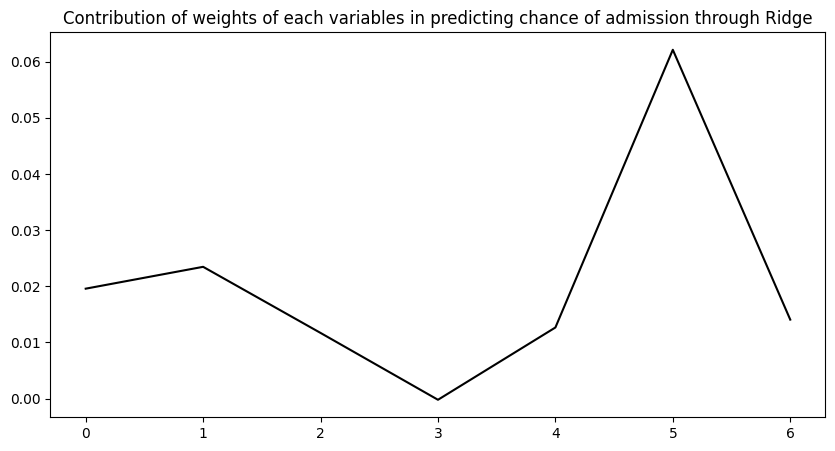

In [37]:
plt.figure(figsize=(10,5))
plt.plot(reg.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Ridge')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Insights:

   * CGPA holds the highest Weightage in coeffieints among all variable during Ridge Regularization.

## LASSO REGRESSION

### LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

### Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

____________________________________________________________________________________
## Objective = RSS + α * (sum of absolute value of coefficients)
____________________________________________________________________________________

### Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients.

________________________________________________________________________
------------------------------------------------------------------------
if α = 0:

* Coefficeints will be the same coefficients as simple linear regression

if α = ∞: 

* All coefficients zero (same logic as before)

0 < α < ∞: 

* Coefficients between 0 and that of simple linear regression
________________________________________________________________________
------------------------------------------------------------------------

In [38]:
laso = Lasso(alpha=0.01)
laso.fit(x_train,y_train)
laso.coef_

array([0.01775501, 0.02058363, 0.00895251, 0.        , 0.0073064 ,
       0.06473126, 0.00817853])

Here we can see that one of the coefficient is zero , it means that the predicted outcome remains unchanged regardless of whether the value of that feature increases or decreases.

In [39]:
laso = Lasso(alpha=1)
laso.fit(x_train,y_train)
laso.coef_

array([0., 0., 0., 0., 0., 0., 0.])

Here all coefficients are zero, it means that the corresponding features have no effect on the predicted outcome.

In [40]:
laso = Lasso(alpha=0.0001)
laso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [41]:
print('Coefficients:',laso.coef_)
print()
print('Intercept:',laso.intercept_)

Coefficients: [ 0.01870951  0.02306132  0.01130287 -0.00045029  0.01230956  0.06455643
  0.01391719]

Intercept: 0.7249727181128369


##### The best alpha value for lasso regression is 0.0001

## Insights
- CGPA feature has a Positive influence on the predicted output
- SOP feature has a negative influence on the predicted output

In [42]:
laso_pred = laso.predict(x_test)

### Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression


In [43]:
print('The score of Lasso Regression for Training Data:',laso.score(x_train,y_train),'.')
print()
print('The score of Lasso Regression for Test Data:',laso.score(x_test,y_test),'.')
print()
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=laso_pred),'.')       # defailt squared =True
print()
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=laso_pred,squared=False),'.')
print()
print('R^2:',r2_score(y_test,laso_pred),'.')
print()
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,laso_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print()

The score of Lasso Regression for Training Data: 0.8209778399606931 .

The score of Lasso Regression for Test Data: 0.8158806046861055 .

Mean Absolute error: 0.04394451781823835 .

Root Mean Squared Error: 0.06421366500579023 .

R^2: 0.8158806046861055 .

Adjusted R^2:  0.8132610197934281 .



## Insights
- There is a small increase in all these metrics 

{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


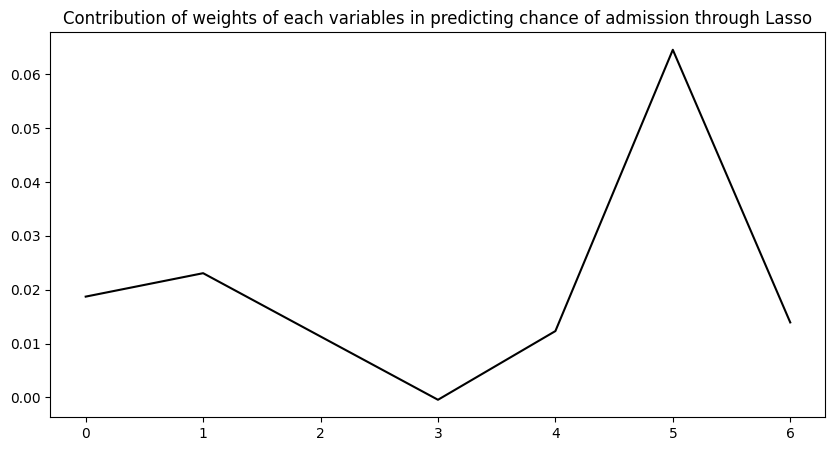

In [44]:
x_ticks = list(x)
y_ticks = list(laso.coef_)
plt.figure(figsize=(10,5))
plt.plot(laso.coef_, color='black')
plt.title('Contribution of weights of each variables in predicting chance of admission through Lasso')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.show()

### Insights:

   * CGPA claims the highest Weightage in coeffieints among all variable during Lasso Regression.
   - Since model is not overfitting, Results for Linear, Ridge and Lasso are the same.
- R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in the data.

## LINEAR REGRESSION ASSUMPTIONS TESTING



### a) Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) 


In [45]:
col = ds[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
x1 = np.array(x_train)
vif = []
for i in range(x1.shape[1]):
    vif.append(round(variance_inflation_factor(x1, i),2))
vif_score= pd.DataFrame({'Columns':['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research'],
                       'VIF score':vif})
    

In [46]:
print(vif_score)

             Columns  VIF score
0          GRE Score       4.49
1        TOEFL Score       4.15
2  University Rating       2.99
3                SOP       2.96
4               LOR        2.03
5               CGPA       4.63
6           Research       1.53


## Insights:-

    It can be observed that every column has a VIF less than 5.
    
##### Hence, there is no multicollinearity among the independent variables.

- The  'Research' has the lowest VIF score of 1.53, indicating that it has the least correlation with the other  predictor variables.
- This means that 'Research' provides unique information that is not highly correlated with the information provided by the other variables.
- 'CGPA' has the highest VIF score of 4.63, suggesting a relatively higher correlation with the other predictor variables compared to the rest.

### b) The mean of residuals is nearly zero

In [47]:
normal = y_test - y_predict
print('Mean of Residuals:',(sum(np.array(normal)/len(normal))))

Mean of Residuals: -0.010793738256654518


## Insights

- suggests a slight underestimation in the model's predictions on average. While this indicates a generally unbiased model.

### c) Linearity of variables
  - It is quite clear from EDA that independent variables are linearly dependent on the target variables

### d) Test for Homoscedasticity 

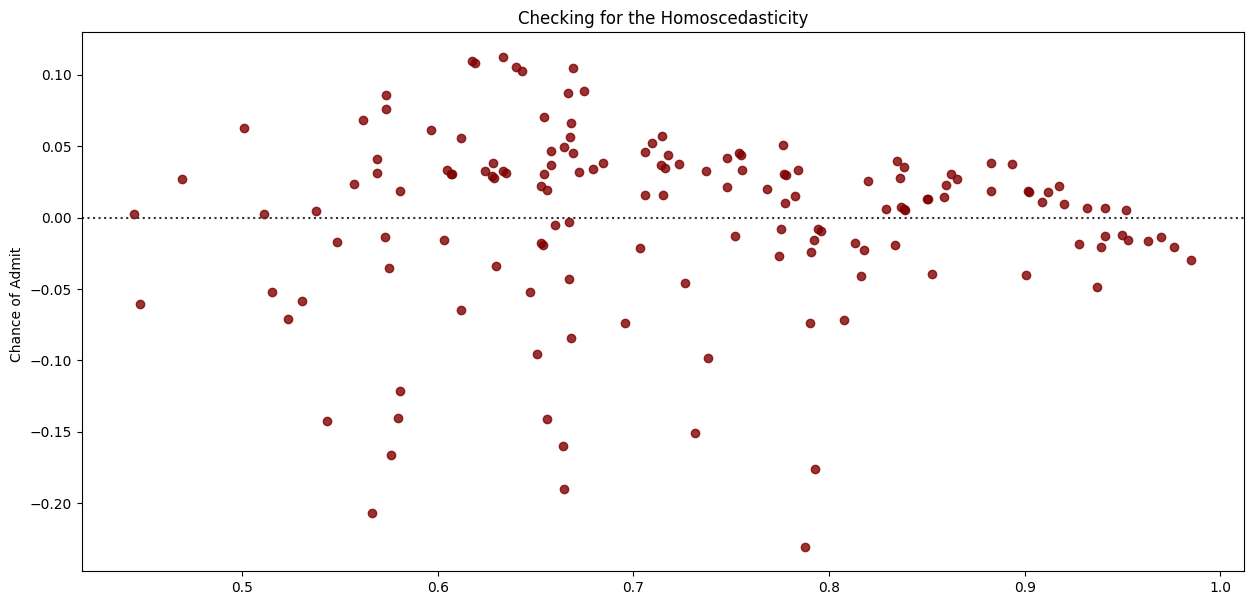

In [48]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=normal,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show() 

## Insights

- No discernible pattern at y=0 in the residual plot indicates homoscedasticity, ensuring the model's errors have a consistent spread across predicted values, implying stable and reliable performance.

### e) Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) 

In [49]:
normal = y_test - y_predict
normal.head()

304   -0.032803
340    0.040549
47    -0.046701
67    -0.161461
479   -0.028033
Name: Chance of Admit , dtype: float64

### Insights
- In summary, the output will be the residuals, which indicate how much the model's predictions deviate from the actual observed values for the first few data points.

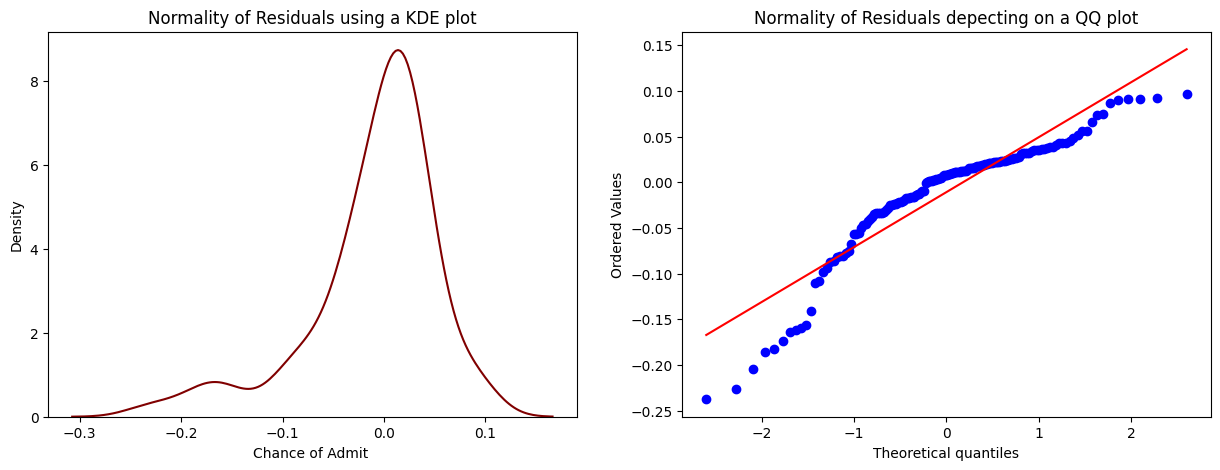

In [50]:
# qq-plot and kde plot of residuals
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x=normal,color='maroon')
plt.title('Normality of Residuals using a KDE plot')

ax = fig.add_subplot(1,2,2)
sp.stats.probplot(normal,plot=plt)
plt.title('Normality of Residuals depecting on a QQ plot')
plt.show()

## Insights

-  The KDE plot resembles a bell-shaped curve (i.e., approximately normal distribution), it suggests that the residuals follow a normal distribution.
- Area of high density(i.e., CGPA) indicate where the majority of residuals are clustered.

- The points in a QQ plot lie approximately along the diagonal line, it indicates that the data closely follows the normal distribution.
- The QQ plot confirms the normality of residuals, as the majority of points are aligned with the diagonal line.

## Recommendations

- After analysing the all features, to get a chance of admit in the universities we understood that the feature "CGPA" is showing more impact.
- CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.
- CGPA is the most important varibale in making the prediction for the Chance of Admit.
- Following are the final model results on the test data:
 - Mean Absolute error: 0.04394451781823835 .
- Root Mean Squared Error: 0.06421366500579023 .
- R^2: 0.8158806046861055 .
- Adjusted R^2:  0.8132610197934281 .
